In [91]:
import os
import re
import sys
import glob
import json
import shutil
import skimage
import tifffile
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
sys.path.append('/Users/keith.cheveralls/projects/opencell/')
from opencell.imaging import utils, viz

sys.path.append('/Users/keith.cheveralls/projects/dragonfly-automation/')
import dragonfly_automation.utils

In [16]:
def get_filename(laser_power, exposure_time):
    dirname = '2020-02-21-%dpercent-%dms' % (laser_power, exposure_time)
    return glob.glob('/Users/keith.cheveralls/image-data/2020-02-21-bleaching-tests/%s/*/*.tif' % dirname)[0]

In [28]:
def calc_percentiles(stack, percentile):
    return [np.percentile(zslice[:], percentile) for zslice in stack]

In [137]:
def generate_naive_mean_profiles(exposure):
    im = tifffile.imread(get_filename(*exposure))
    profile = im[im > 600].mean(axis=2).mean(axis=1)
    return profile

def generate_percentile_profiles(exposure):
    im = tifffile.imread(get_filename(*exposure))
    profile = calc_percentiles(im, 95)
    return profile

def generate_masked_mean_profiles(exposure):
    im = tifffile.imread(get_filename(*exposure))
    proj = im.max(axis=0)
    mask = proj > skimage.filters.threshold_li(proj)
    profile = [zslice[mask].flatten().mean() for zslice in im]
    return profile

In [ ]:
# exposures as (laser_power, exposure_time)
exposures = [
    (5, 50),
    (10, 50),
    (15, 50),
    (30, 50),
    (30, 150),
    (10, 500),
    (50, 100),
]

In [ ]:
im = tifffile.imread(get_filename(5, 50))
im.shape

In [ ]:
imm = im[0, ...]
proj = im.max(axis=0)
mask = proj > skimage.filters.threshold_li(proj)
plt.imshow(mask)

In [ ]:
mean_profiles = {}
for exposure in exposures:
    print(exposure)
    mean_profiles[exposure] = generate_mean_profiles(exposure)

In [ ]:
masked_mean_profiles = {}
for exposure in exposures:
    print(exposure)
    masked_mean_profiles[exposure] = generate_masked_mean_profiles(exposure)

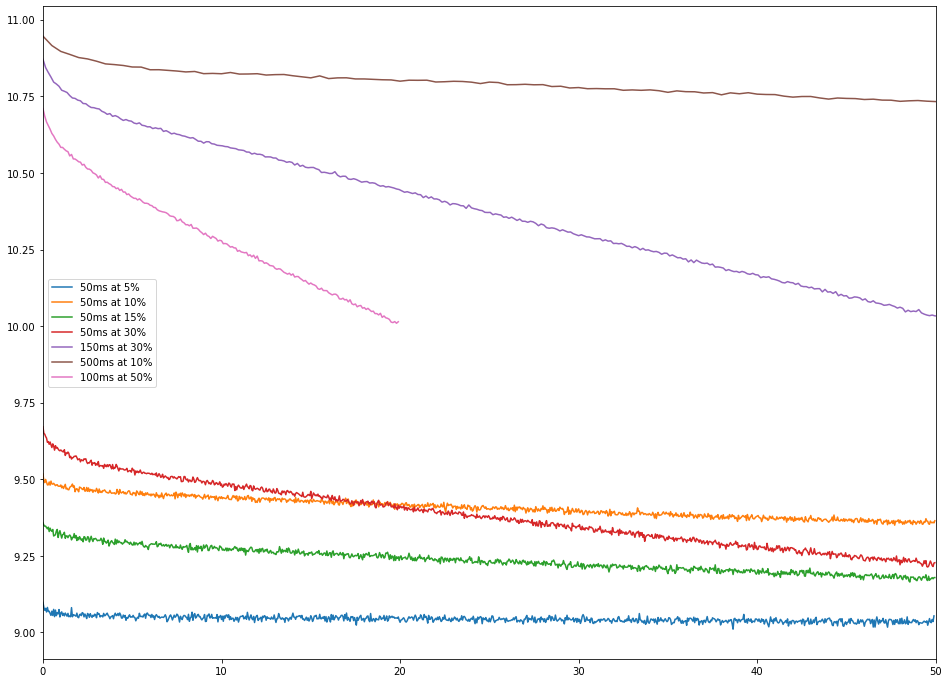

In [131]:
# mean profiles
plt.figure(figsize=(16, 12))
for exposure in exposures:
    laser_power, exposure_time = exposure
    profile = np.array(mean_profiles[exposure])
    plt.plot(np.arange(len(profile)) * (exposure_time/1000), np.log2(profile/1), label='%dms at %s%%' % (exposure_time, laser_power))
    plt.legend()
    plt.gca().set_xlim([0, 50])
    # plt.gca().set_ylim([-.5, 0])

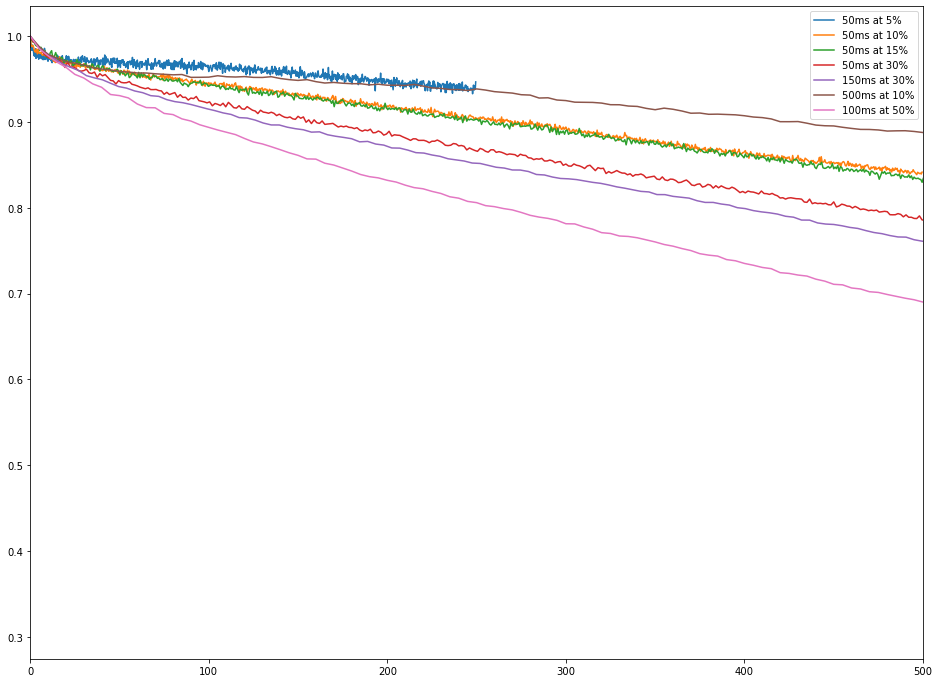

In [150]:
# mean profiles of masked images
plt.figure(figsize=(16, 12))
for exposure in exposures:
    laser_power, exposure_time = exposure
    profile = np.array(masked_mean_profiles[exposure])
    plt.plot(np.arange(len(profile)) * (exposure_time/1000) * laser_power, profile/profile[0], label='%dms at %s%%' % (exposure_time, laser_power))
    plt.legend()
    plt.gca().set_xlim([0, 500])
    # plt.gca().set_ylim([-.5, 0])

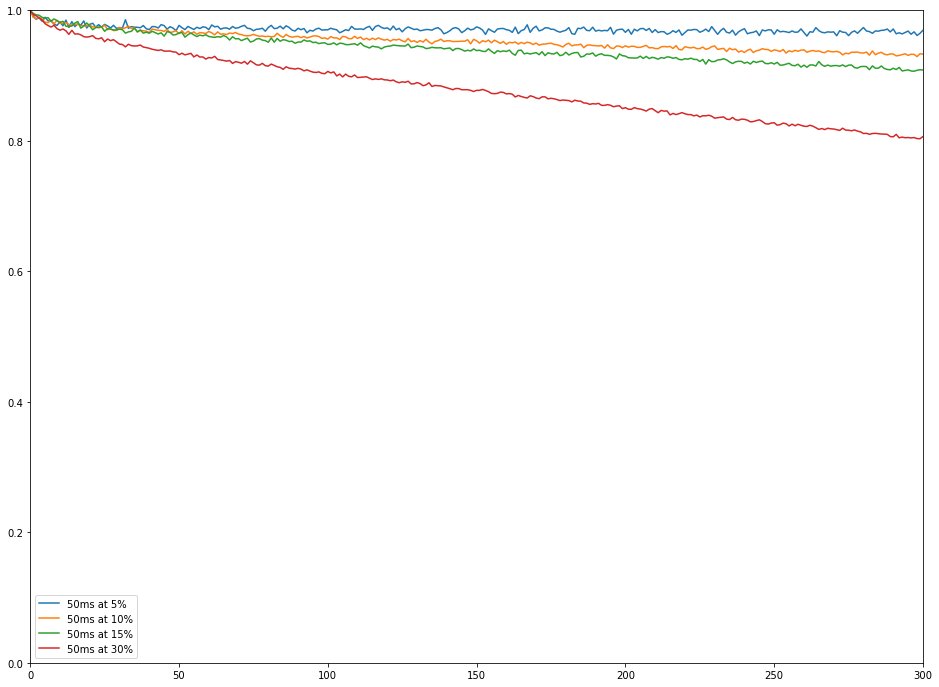

In [148]:
# mean profiles of masked images
plt.figure(figsize=(16, 12))
for exposure in ((5, 50),(10, 50),(15, 50),(30, 50)):
    laser_power, exposure_time = exposure
    profile = np.array(masked_mean_profiles[exposure])
    plt.plot(np.arange(len(profile)), profile/profile[0], label='%dms at %s%%' % (exposure_time, laser_power))
    plt.legend()
    plt.gca().set_xlim([0, 300])
    plt.gca().set_ylim([0, 1])